In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
train_files=glob.glob("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers/*/**")

In [5]:
len(train_files)

15740

In [7]:
train_files

['C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\10091895024_a2ea04cda6_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\1033455028_f0c6518ec9_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\10373087134_927b53fb9f_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\1052212431_4963309d03_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\1052219251_d03970e956_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\1052586928_366c5255b8_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\1052587144_34c9f0714c_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\astilbe\\1053073526_188a5b816e_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club proj

In [8]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\iris\\15862525391_80509c9e2f_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\dandelion\\14399230879_7a0e03e707_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\bellflower\\5916346285_63f369cabb_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\water_lily\\35845576790_a214fab47e_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\california_poppy\\49581296378_a96f89d16e_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\magnolia\\17082817236_f407c4c65e_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\dandelion\\26291294735_f7569430a6_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\water_lily\\20280953940_c9fc148ed2_c.jpg',
 'C:/Users/DIBYAJYOTI HALOI/O

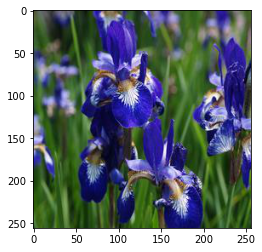

In [9]:
from PIL import Image
img=Image.open(train_files[0])
plt.imshow(img)

In [10]:
np.array(img).shape

(256, 256, 3)

In [16]:
grey_files=[]

In [18]:
for item in train_files:
    img=Image.open(item).convert('L')
    img.save('greyscale.jpg')
    grey_files.append(img)

In [19]:
np.array(grey_files[0]).shape

(256, 256)

In [20]:
modified_files=[]

In [21]:
for item in grey_files:
    img=item.resize((128,128))
    modified_files.append(img)

In [22]:
np.array(modified_files[0]).shape

(128, 128)

In [23]:
X_train=np.zeros((len(modified_files),128,128))
for i,fi in enumerate(modified_files):
    fi_array=np.array(fi)
    if(fi_array.shape[0]==128 and fi_array.shape[1]==128):
        X_train[i,:,:]=fi_array

In [24]:
X_train[0]

array([[ 79.,  82.,  94., ...,  79.,  82.,  89.],
       [ 82.,  84.,  94., ...,  80.,  81.,  84.],
       [ 87.,  87.,  94., ...,  82.,  81.,  82.],
       ...,
       [ 95., 102.,  82., ...,  69.,  58.,  61.],
       [ 82., 100.,  89., ...,  62.,  54.,  50.],
       [ 70.,  94.,  96., ...,  58.,  53.,  45.]])

In [25]:
X_train/255.0

array([[[0.30980392, 0.32156863, 0.36862745, ..., 0.30980392,
         0.32156863, 0.34901961],
        [0.32156863, 0.32941176, 0.36862745, ..., 0.31372549,
         0.31764706, 0.32941176],
        [0.34117647, 0.34117647, 0.36862745, ..., 0.32156863,
         0.31764706, 0.32156863],
        ...,
        [0.37254902, 0.4       , 0.32156863, ..., 0.27058824,
         0.22745098, 0.23921569],
        [0.32156863, 0.39215686, 0.34901961, ..., 0.24313725,
         0.21176471, 0.19607843],
        [0.2745098 , 0.36862745, 0.37647059, ..., 0.22745098,
         0.20784314, 0.17647059]],

       [[0.44705882, 0.41176471, 0.34901961, ..., 0.24313725,
         0.24313725, 0.25098039],
        [0.44705882, 0.41176471, 0.35686275, ..., 0.24313725,
         0.24313725, 0.24705882],
        [0.43921569, 0.40392157, 0.36470588, ..., 0.25490196,
         0.24705882, 0.23529412],
        ...,
        [0.85098039, 0.84705882, 0.83529412, ..., 0.40392157,
         0.43137255, 0.44313725],
        [0.8

In [41]:
train_files[0]

'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/club project/archive (1)/flowers\\iris\\15862525391_80509c9e2f_c.jpg'

In [48]:
Y_train=np.zeros((len(train_files)))
for i,fi in enumerate(train_files):
    x=76
    p=1
    while fi[x]!='\\':
          Y_train[i]=(Y_train[i]+(ord(fi[x])-ord('a'))*p)
          x=x+1
          p=p*10

In [51]:
Y_train

array([1.89780000e+04, 1.44914430e+09, 1.76351621e+10, ...,
       9.25361200e+06, 5.95700000e+03, 1.32017836e+16])